In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


# Proje Adƒ±m 1: Veri Y√ºkleme ve Birle≈ütirme

Bu ilk adƒ±mda amacƒ±mƒ±z, projemizin temelini olu≈üturan kaza verilerini √ßalƒ±≈üma ortamƒ±mƒ±za almak ve analiz i√ßin tek, b√ºy√ºk bir veri √ßer√ßevesinde birle≈ütirmek.

**Neden Bu Adƒ±mƒ± Yapƒ±yoruz?**

Veri setindeki kaza bilgileri farklƒ± yƒ±llara ait ayrƒ± CSV dosyalarƒ±nda bulunuyor (√∂rneƒüin, accidents_2005_to_2007.csv, accidents_2009_to_2011.csv, accidents_2012_to_2014.csv). Eƒüer bu dosyalarƒ± tek tek analiz etmeye kalkarsak:

Zaman Kaybƒ±: Her dosya i√ßin aynƒ± analiz adƒ±mlarƒ±nƒ± tekrarlamak zorunda kalƒ±rƒ±z.

Karma≈üƒ±klƒ±k: T√ºm yƒ±llar boyunca genel eƒüilimleri veya desenleri g√∂rmek zorla≈üƒ±r.

Tutarsƒ±zlƒ±k Potansiyeli: Farklƒ± dosyalar arasƒ±nda veri temizliƒüi veya d√∂n√º≈ü√ºmlerde hatalar yapma olasƒ±lƒ±ƒüƒ±mƒ±z artar.

Bu nedenle, t√ºm kaza verilerini tek bir Pandas DataFrame'inde birle≈ütirmek, daha sonraki analizlerimizi (eksik deƒüer analizi, veri tiplerini kontrol etme, istatistiksel analizler, modelleme) √ßok daha kolay ve verimli hale getirecektir. Bu, veri biliminde "Veri Entegrasyonu" olarak bilinen √∂nemli bir adƒ±mdƒ±r.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# T√ºm uyarƒ±larƒ± kapatmak i√ßin:
warnings.filterwarnings("ignore")

# Kaza veri setlerinin yollarƒ±
accident_files = [
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv',
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv',
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv'
]

# T√ºm kaza verilerini depolamak i√ßin bo≈ü bir liste olu≈üturuyoruz.
# Her bir CSV dosyasƒ±nƒ± okuduƒüumuzda, okunan DataFrame'i bu listeye ekleyeceƒüiz.
df_list = []

print("Kaza veri dosyalarƒ± y√ºkleniyor...")
# Her bir dosya yolu √ºzerinde d√∂ng√º yapƒ±yoruz.
for file_path in accident_files:
    try:
        # pd.read_csv() fonksiyonu ile CSV dosyasƒ±nƒ± okuyoruz ve ge√ßici bir DataFrame'e (df_temp) atƒ±yoruz.
        df_temp = pd.read_csv(file_path)
        # Okunan DataFrame'i df_list'e ekliyoruz.
        df_list.append(df_temp)
        print(f"'{file_path}' ba≈üarƒ±yla y√ºklendi. Satƒ±r sayƒ±sƒ±: {len(df_temp)}")
    except FileNotFoundError:
        # Eƒüer belirtilen yolda dosya bulunamazsa hata mesajƒ± veriyoruz.
        print(f"Hata: '{file_path}' bulunamadƒ±. L√ºtfen dosya yolunu kontrol edin.")
    except Exception as e:
        # Diƒüer olasƒ± hatalarƒ± yakalamak i√ßin genel bir hata mesajƒ±.
        print(f"Hata olu≈ütu '{file_path}' okunurken: {e}")

# Eƒüer liste bo≈ü deƒüilse (yani en az bir dosya y√ºklenebildiyse),
# pd.concat() fonksiyonu ile listedeki t√ºm DataFrame'leri dikey olarak (alt alta) birle≈ütiriyoruz.
# ignore_index=True parametresi, birle≈ütirme sonrasƒ± indekslerin sƒ±fƒ±rdan ba≈ülamasƒ±nƒ± saƒülar,
# bu da yinelenen indeks sorunlarƒ±nƒ± √∂nler.
if df_list:
    df_accidents = pd.concat(df_list, ignore_index=True)
    print("\n--- T√ºm Kaza Verileri Ba≈üarƒ±yla Birle≈ütirildi! ---")
    print(f"Toplam kaza kaydƒ±: {len(df_accidents)} satƒ±r ve {df_accidents.shape[1]} s√ºtun.")
else:
    # Eƒüer hi√ß dosya y√ºklenememi≈üse, kullanƒ±cƒ±ya bilgi veriyoruz.
    print("\nHi√ßbir kaza dosyasƒ± y√ºklenemedi. Devam edilemiyor.")

# Birle≈ütirilmi≈ü veri √ßer√ßevesinin ilk 5 satƒ±rƒ±nƒ± g√∂r√ºnt√ºl√ºyoruz.
# Bu, verinin nasƒ±l g√∂r√ºnd√ºƒü√º, hangi s√ºtunlarƒ±n olduƒüu hakkƒ±nda hƒ±zlƒ± bir fikir verir.
print("\n--- Birle≈ütirilmi≈ü Kaza Verisi ƒ∞lk 5 Satƒ±r ---")
print(df_accidents.head())

# Veri setinin genel bilgilerini g√∂r√ºnt√ºl√ºyoruz.
# Bu, her s√ºtunun adƒ±nƒ±, bo≈ü olmayan deƒüer sayƒ±sƒ±nƒ± ve veri tipini g√∂sterir.
# Bu bilgi, eksik deƒüerleri ve yanlƒ±≈ü veri tiplerini tespit etmek i√ßin kritik √∂neme sahiptir.
print("\n--- Birle≈ütirilmi≈ü Kaza Verisi Bilgileri ---")
df_accidents.info()

Kaza veri dosyalarƒ± y√ºkleniyor...
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv' ba≈üarƒ±yla y√ºklendi. Satƒ±r sayƒ±sƒ±: 570011
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv' ba≈üarƒ±yla y√ºklendi. Satƒ±r sayƒ±sƒ±: 469442
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv' ba≈üarƒ±yla y√ºklendi. Satƒ±r sayƒ±sƒ±: 464697

--- T√ºm Kaza Verileri Ba≈üarƒ±yla Birle≈ütirildi! ---
Toplam kaza kaydƒ±: 1504150 satƒ±r ve 33 s√ºtun.

--- Birle≈ütirilmi≈ü Kaza Verisi ƒ∞lk 5 Satƒ±r ---
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS0000

# √áƒ±ktƒ±larƒ±n Analizi
**Veri Birle≈ütirme Ba≈üarƒ±sƒ±:**

T√ºm kaza dosyalarƒ± ba≈üarƒ±yla y√ºklendi ve birle≈ütirildi. Toplam 1,504,150 kaza kaydƒ± ve 33 s√ºtunumuz var. Bu, b√ºy√ºk bir veri seti ve analizi i√ßin yeterli bilgiye sahibiz demektir.

**1.df.head() √áƒ±ktƒ±sƒ± (ƒ∞lk 5 Satƒ±r):**

S√ºtun isimleri ve ilk birka√ß g√∂zlem, veri setinin i√ßeriƒüi hakkƒ±nda bir fikir veriyor.

Tarih (Date) ve Saat (Time) gibi s√ºtunlar ≈üu anda object (metin) tipinde g√∂r√ºn√ºyor. Bunlarƒ± ileride zaman serisi analizi yapabilmek i√ßin doƒüru datetime formatƒ±na d√∂n√º≈üt√ºrmemiz gerekecek.

Kaza ≈üiddeti (Accident_Severity), ara√ß sayƒ±sƒ± (Number_of_Vehicles), √∂l√º/yaralƒ± sayƒ±sƒ± (Number_of_Casualties) gibi √∂nemli sayƒ±sal s√ºtunlar mevcut.

**2.df.info() √áƒ±ktƒ±sƒ± (Veri Seti Bilgileri):**

Toplam Kayƒ±t Sayƒ±sƒ±: 1,504,150.

S√ºtun Sayƒ±sƒ±: 33.

**3.Veri Tipleri (Dtype):** float64 (ondalƒ±klƒ± sayƒ±lar), int64 (tam sayƒ±lar), object (metin veya karƒ±≈üƒ±k tipler) mevcut. √ñzellikle object tipindeki s√ºtunlarƒ± (Date, Time, Road_Type, Light_Conditions, Weather_Conditions vb.) daha yakƒ±ndan incelememiz gerekecek.

Non-Null Count (Bo≈ü Olmayan Deƒüer Sayƒ±sƒ±): Bu kƒ±sƒ±m bize her s√ºtunda ka√ß tane bo≈ü olmayan (NaN - Not a Number) deƒüer olduƒüunu g√∂steriyor. Toplam kayƒ±t sayƒ±sƒ±yla kar≈üƒ±la≈ütƒ±rƒ±ldƒ±ƒüƒ±nda, bazƒ± s√ºtunlarda √∂nemli miktarda eksik deƒüer olduƒüunu g√∂rebiliyoruz:

Junction_Detail: Tamamen bo≈ü (0 non-null). Bu s√ºtun muhtemelen hi√ßbir i≈üimize yaramayacak.

Special_Conditions_at_Site ve Carriageway_Hazards: √áok b√ºy√ºk oranda bo≈ü.

Junction_Control, Time, Weather_Conditions, Road_Surface_Conditions, Did_Police_Officer_Attend_Scene_of_Accident, LSOA_of_Accident_Location, Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude: Bu s√ºtunlarda da bir miktar eksik deƒüer var, ancak Junction_Detail kadar kritik deƒüiller.

# Proje Adƒ±m 2: Veri Ke≈üfi (EDA) - Eksik Deƒüer Analizi
Bu adƒ±mda amacƒ±mƒ±z, hangi s√ºtunlarda ne kadar eksik veri olduƒüunu g√∂rselle≈ütirmek ve verinin genel yapƒ±sƒ± hakkƒ±nda daha derinlemesine bilgi edinmek.

**Neden Bu Adƒ±mƒ± Yapƒ±yoruz?**

*Veri Kalitesi Anlayƒ±≈üƒ±:* Eksik deƒüerler, veri setimizdeki bo≈üluklarƒ± ve g√ºvenilmez bilgileri g√∂sterir. Bu bo≈üluklarƒ±n ne kadar yaygƒ±n olduƒüunu anlamak, sonraki veri temizleme stratejilerimizi belirlememiz i√ßin hayati √∂neme sahiptir.

*√ñncelik Belirleme:* Hangi s√ºtunlarƒ±n daha fazla dikkat gerektirdiƒüini (silinmeli mi, doldurulmalƒ± mƒ±?) anlamamƒ±za yardƒ±mcƒ± olur.

*Potansiyel Sorunlarƒ± Belirleme:* Bazƒ± s√ºtunlarƒ±n tamamen veya b√ºy√ºk √∂l√ß√ºde bo≈ü olmasƒ±, onlarƒ±n analizden √ßƒ±karƒ±lmasƒ± gerektiƒüine i≈üaret eder.


--- Eksik Deƒüer Y√ºzdeleri (Birle≈ütirilmi≈ü Kaza Verisi) ---
                                    column_name  missing_percentage
18                              Junction_Detail          100.000000
28                          Carriageway_Hazards           98.188346
27                   Special_Conditions_at_Site           97.567929
19                             Junction_Control           40.078117
31                    LSOA_of_Accident_Location            7.195958
30  Did_Police_Officer_Attend_Scene_of_Accident            0.194263
26                      Road_Surface_Conditions            0.130173
25                           Weather_Conditions            0.008377
11                                         Time            0.007778
4                                      Latitude            0.006715
3                                     Longitude            0.006715
1                         Location_Easting_OSGR            0.006715
2                        Location_Northing_OSGR     

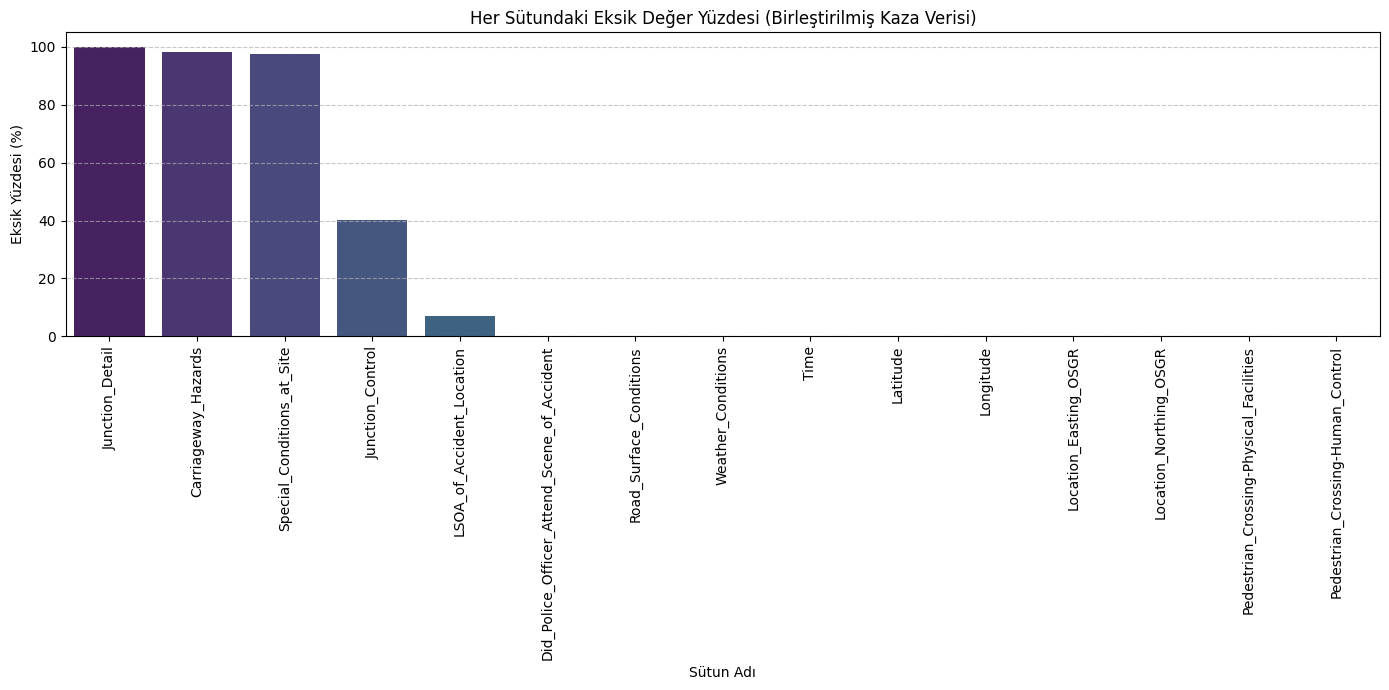


--- Sayƒ±sal S√ºtunlarƒ±n Temel ƒ∞statistikleri (Birle≈ütirilmi≈ü Kaza Verisi) ---
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.504049e+06            1.504049e+06  1.504049e+06   
mean            4.396214e+05            3.001584e+05 -1.436625e+00   
std             9.511616e+04            1.610084e+05  1.398078e+00   
min             6.495000e+04            1.029000e+04 -7.516225e+00   
25%             3.750600e+05            1.782600e+05 -2.373902e+00   
50%             4.399600e+05            2.688300e+05 -1.403714e+00   
75%             5.230600e+05            3.981510e+05 -2.215100e-01   
max             6.553700e+05            1.208800e+06  1.759398e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.504049e+06  1.504150e+06       1.504150e+06        1.504150e+06   
mean   5.258940e+01  3.020536e+01       2.838190e+00        1.831606e+00   
std    1.449889e+00  2.551603e+01       4.018423e-01     

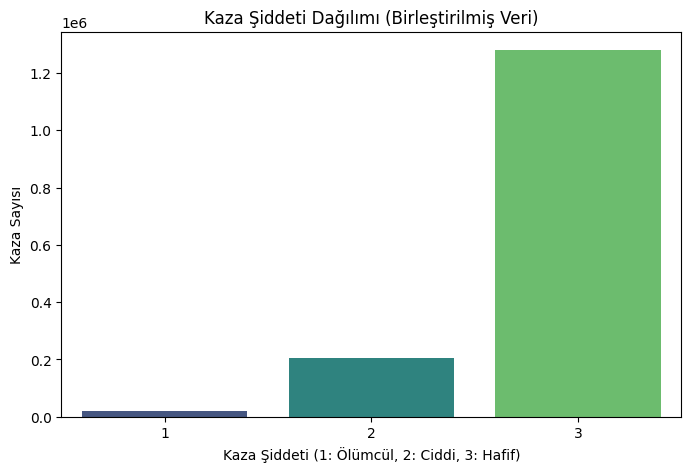

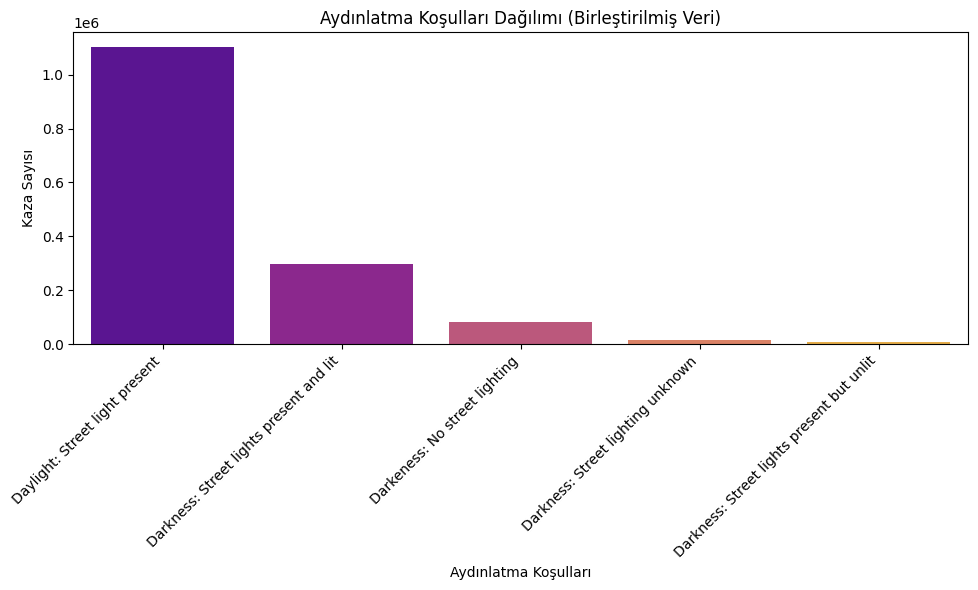

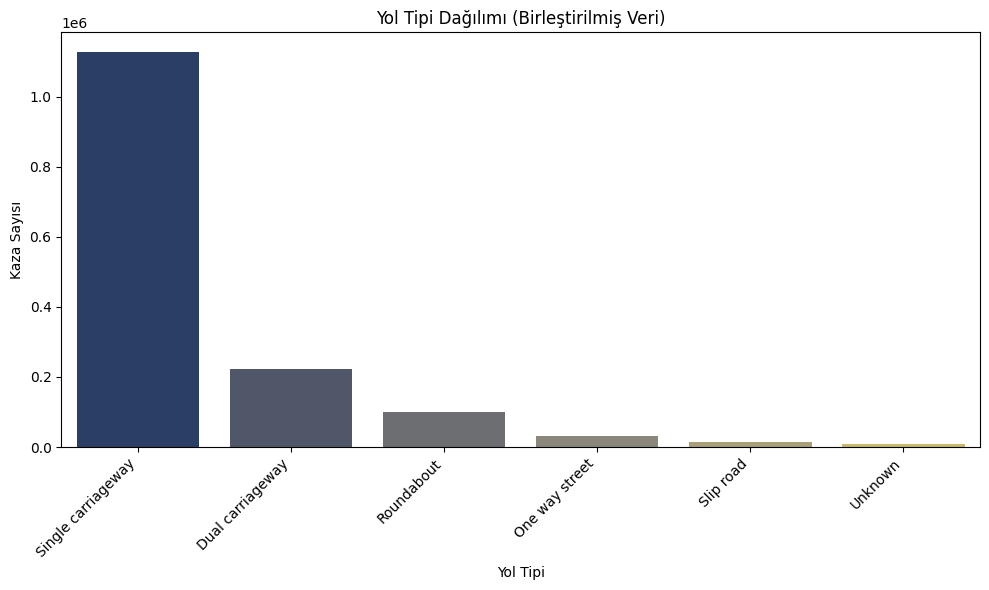

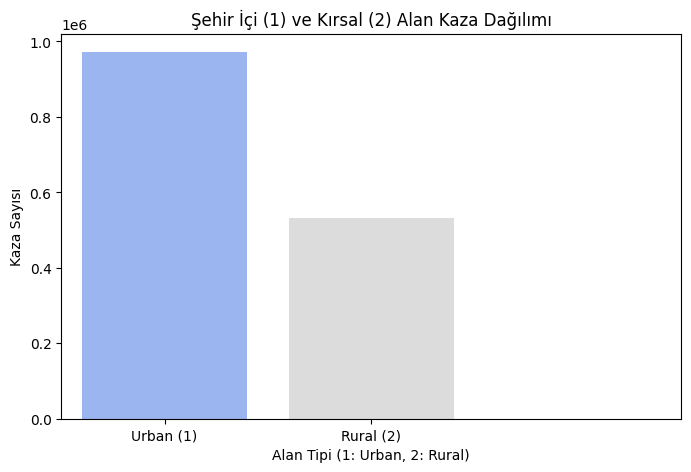

In [11]:
# Eksik deƒüerlerin y√ºzdesini hesapla
# .isnull().sum() her s√ºtundaki null deƒüer sayƒ±sƒ±nƒ± verir.
# / len(df_accidents) ile toplam satƒ±r sayƒ±sƒ±na b√∂lerek y√ºzdeyi buluruz.
# * 100 ile y√ºzde formatƒ±na √ßeviririz.
missing_percentage = df_accidents.isnull().sum() * 100 / len(df_accidents)

# Bu y√ºzdeleri bir DataFrame'e d√∂n√º≈üt√ºr√ºyoruz ki kolayca sƒ±ralayabiliriz.
missing_df = pd.DataFrame({'column_name': missing_percentage.index,
                           'missing_percentage': missing_percentage.values})
# Eksik deƒüer y√ºzdelerine g√∂re azalan sƒ±rayla sƒ±ralƒ±yoruz.
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print("\n--- Eksik Deƒüer Y√ºzdeleri (Birle≈ütirilmi≈ü Kaza Verisi) ---")
# Sadece eksik deƒüeri olan s√ºtunlarƒ± ve y√ºzdelerini g√∂ster.
# Bu, tam dolu s√ºtunlarƒ± g√∂rmezden gelmemizi saƒülar.
print(missing_df[missing_df['missing_percentage'] > 0])

# --- Eksik Deƒüerleri G√∂rselle≈ütirme ---
# G√∂rselle≈ütirmeyi sadece eksik deƒüeri olan s√ºtunlar i√ßin yapƒ±yoruz.
missing_df_to_plot = missing_df[missing_df['missing_percentage'] > 0]

if not missing_df_to_plot.empty:
    plt.figure(figsize=(14, 7)) # Grafiƒüin boyutunu ayarlƒ±yoruz.
    sns.barplot(x='column_name', y='missing_percentage', data=missing_df_to_plot, palette='viridis')
    plt.xticks(rotation=90) # S√ºtun isimleri uzun olabileceƒüi i√ßin etiketleri 90 derece d√∂nd√ºr√ºyoruz.
    plt.title('Her S√ºtundaki Eksik Deƒüer Y√ºzdesi (Birle≈ütirilmi≈ü Kaza Verisi)')
    plt.ylabel('Eksik Y√ºzdesi (%)')
    plt.xlabel('S√ºtun Adƒ±')
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Yatay ƒ±zgara √ßizgileri ekliyoruz.
    plt.tight_layout() # Grafiƒüin sƒ±kƒ±≈ümamasƒ±nƒ± saƒülar.
    plt.show()
else:
    print("\nVeri setinde eksik deƒüer bulunmamaktadƒ±r.")

# --- Temel ƒ∞statistikler ---
# df.describe() fonksiyonu, sayƒ±sal s√ºtunlar i√ßin temel istatistikleri (sayƒ±, ortalama, std, min, max, √ßeyreklikler) hesaplar.
# Bu, verinin merkezi eƒüilimi ve yayƒ±lƒ±mƒ± hakkƒ±nda hƒ±zlƒ± bir fikir verir.
print("\n--- Sayƒ±sal S√ºtunlarƒ±n Temel ƒ∞statistikleri (Birle≈ütirilmi≈ü Kaza Verisi) ---")
print(df_accidents.describe())

# --- Kategorik S√ºtunlarƒ±n Benzersiz Deƒüerleri ve Frekanslarƒ± ---
print("\n--- Kategorik S√ºtunlardaki Benzersiz Deƒüerler ve Frekanslarƒ± (Birle≈ütirilmi≈ü Kaza Verisi) ---")
# DataFrame'deki object (genellikle metinsel) tipindeki s√ºtunlarƒ± se√ßiyoruz.
for column in df_accidents.select_dtypes(include='object').columns:
    # Eƒüer s√ºtundaki benzersiz deƒüer sayƒ±sƒ± 50'den az ise (yani √ßok fazla kategori yoksa),
    # o s√ºtunun her bir kategorisinin ka√ßar kez ge√ßtiƒüini (frekansƒ±nƒ±) g√∂steriyoruz.
    if df_accidents[column].nunique() < 50:
        print(f"\nS√ºtun: {column}")
        print(df_accidents[column].value_counts())
    else:
        # Eƒüer √ßok fazla benzersiz deƒüer varsa (√∂rneƒüin ID'ler veya serbest metin alanlarƒ±),
        # t√ºm unique deƒüerleri listelemek yerine ilk 5'ini g√∂steriyoruz.
        print(f"\nS√ºtun: {column} - √áok fazla benzersiz deƒüer (√∂rneƒüin ID'ler). Benzersiz deƒüer sayƒ±sƒ±: {df_accidents[column].nunique()}. ƒ∞lk 5: {df_accidents[column].head().tolist()}")

# --- √ñnemli Kategorik S√ºtunlarƒ±n Daƒüƒ±lƒ±mƒ±nƒ± G√∂rselle≈ütirme ---
# Kaza ≈üiddeti daƒüƒ±lƒ±mƒ±: 1 (√ñl√ºmc√ºl), 2 (Ciddi), 3 (Hafif)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_accidents, x='Accident_Severity', palette='viridis')
plt.title('Kaza ≈ûiddeti Daƒüƒ±lƒ±mƒ± (Birle≈ütirilmi≈ü Veri)')
plt.xlabel('Kaza ≈ûiddeti (1: √ñl√ºmc√ºl, 2: Ciddi, 3: Hafif)')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.show()

# Aydƒ±nlatma Ko≈üullarƒ± daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x='Light_Conditions', palette='plasma', order=df_accidents['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Aydƒ±nlatma Ko≈üullarƒ± Daƒüƒ±lƒ±mƒ± (Birle≈ütirilmi≈ü Veri)')
plt.xlabel('Aydƒ±nlatma Ko≈üullarƒ±')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.tight_layout()
plt.show()

# Yol Tipi daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x='Road_Type', palette='cividis', order=df_accidents['Road_Type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Yol Tipi Daƒüƒ±lƒ±mƒ± (Birle≈ütirilmi≈ü Veri)')
plt.xlabel('Yol Tipi')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.tight_layout()
plt.show()

# ≈ûehir i√ßi/Kƒ±rsal Alan daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(8, 5))
sns.countplot(data=df_accidents, x='Urban_or_Rural_Area', palette='coolwarm')
plt.title('≈ûehir ƒ∞√ßi (1) ve Kƒ±rsal (2) Alan Kaza Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Alan Tipi (1: Urban, 2: Rural)')
plt.ylabel('Kaza Sayƒ±sƒ±')
plt.xticks(ticks=[0, 1], labels=['Urban (1)', 'Rural (2)']) # Etiketleri daha a√ßƒ±klayƒ±cƒ± yapalƒ±m
plt.show()

## üìä √áƒ±ktƒ±larƒ±n Detaylƒ± Analizi ve Kararlar

---

### üîç 1. Eksik Deƒüer Analizi

| S√ºtun Adƒ±                         | Eksik Y√ºzdesi (%) | G√∂zlem ve Karar                                                                                                                                       |
|----------------------------------|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Junction_Detail**              | %100              | Tamamen bo≈ü. Bu s√ºtun hi√ßbir bilgi i√ßermediƒüi i√ßin **silinecek**.                                                                                   |
| **Carriageway_Hazards**          | %98.19            | √áok b√ºy√ºk oranda bo≈ü. G√ºvenilir bilgi saƒülamaz. **Silinecek.**                                                                                      |
| **Special_Conditions_at_Site**   | %97.57            | Yine √ßok b√ºy√ºk oranda bo≈ü. **Silinecek.**                                                                                                           |
| **Junction_Control**             | %40.08            | √ñnemli miktarda eksik. Kav≈üak kontrol bilgisi √∂nemli olabilir. ≈ûimdilik bƒ±rakƒ±lacak, **eksik deƒüer doldurma stratejisi sonra belirlenecek.**       |
| **LSOA_of_Accident_Location**    | %7.20             | Konum bilgisi i√ßeriyor. ≈ûimdilik bƒ±rakƒ±lacak, **modelleme a≈üamasƒ±nda karar verilecek.**                                                             |
| **Diƒüer S√ºtunlar**               | <%1               | Eksikliƒüi √ßok az. <br> Sayƒ±sal ise: Ortalama/medyan ile doldurulabilir. <br> Kategorik ise: Mod ile doldurma ya da ‚ÄúBilinmiyor‚Äù olarak i≈üaretleme. <br> ƒ∞lk a≈üamada **eksik satƒ±rlar silinecek.** |

#### üßæ Karar √ñzeti:
- **Silinecek S√ºtunlar**: `Junction_Detail`, `Carriageway_Hazards`, `Special_Conditions_at_Site`
- **ƒ∞leride Ele Alƒ±nacak Eksikler**: `Junction_Control`, `LSOA_of_Accident_Location`
- **K√º√ß√ºk Eksikler**: ƒ∞lgili satƒ±rlar **silinecek**

---

### üìà 2. Sayƒ±sal S√ºtunlarƒ±n Temel ƒ∞statistikleri

- **Konum Verileri** (`Location_Easting_OSGR`, `Location_Northing_OSGR`, `Longitude`, `Latitude`): Ortalama ve standart sapmalar makul. Coƒürafi olarak anlamlƒ± daƒüƒ±lƒ±mlar g√∂steriyor.
- **Accident_Severity**: Ortalama ‚âà 2.83 ‚Üí √áoƒüunlukla **Hafif** kazalar var. Veri k√ºmesi **sƒ±nƒ±f dengesizliƒüine** sahip, sƒ±nƒ±flandƒ±rma modellerinde dikkate alƒ±nmalƒ±.
- **Number_of_Vehicles & Number_of_Casualties**: Ortalama sƒ±rasƒ±yla 1.83 ve 1.35. Maksimum deƒüerlerin y√ºksek olmasƒ± ‚Üí **u√ß deƒüerler** mevcut olabilir.
- **Speed_limit**: Ortalama ‚âà 39 mph. Deƒüerler mantƒ±klƒ± aralƒ±kta (10‚Äì70 mph).
- **Year**: 2005‚Äì2014 arasƒ±. Veri kapsamƒ± doƒürulandƒ± ‚úÖ

---

### üß© 3. Kategorik S√ºtunlar ‚Äì Benzersiz Deƒüerler ve Frekanslarƒ±

#### üß∑ √áok Fazla Benzersiz Deƒüere Sahip:
- `Accident_Index`, `Date`, `Time`: Benzersiz olmalarƒ± normal.
- `Local_Authority_(Highway)`, `LSOA_of_Accident_Location`: Coƒürafi analizlerde kullanƒ±labilir.

#### üìå Daha Az Benzersiz Deƒüere Sahip:
- `Road_Type`, `Junction_Control`, `Pedestrian_Crossing-Human_Control`, `Pedestrian_Crossing-Physical_Facilities`, `Light_Conditions`, `Weather_Conditions`, `Road_Surface_Conditions`, `Did_Police_Officer_Attend_Scene_of_Accident`, `Urban_or_Rural_Area`

Bu s√ºtunlar **kazanƒ±n ger√ßekle≈ütiƒüi ko≈üullar** hakkƒ±nda doƒürudan bilgi verir. Frekans daƒüƒ±lƒ±mlarƒ± mantƒ±klƒ± ve analiz i√ßin olduk√ßa deƒüerlidir.

> üö© **Not**: `Urban_or_Rural_Area` s√ºtunu, projenin ‚Äú**Kƒ±rsal ve kentsel alanlar nasƒ±l farklƒ±la≈ütƒ±?**‚Äù sorusuna yanƒ±t vermek i√ßin kritik.  
> `1`: Urban (≈ûehir ƒ∞√ßi)  
> `2`: Rural (Kƒ±rsal)

---


# Proje Adƒ±m 3: Veri Temizleme ve Tip D√∂n√º≈ü√ºmleri

Bu adƒ±mda, veri setimizi analiz i√ßin daha uygun hale getireceƒüiz.

**Neden Bu Adƒ±mƒ± Yapƒ±yoruz?**

*Eksik Veri Y√∂netimi:* Analizleri bozabilecek veya modellerin performansƒ±nƒ± d√º≈ü√ºrebilecek eksik deƒüerlerden kurtulmak.

*Doƒüru Veri Tipleri:* Tarih ve saat gibi verilerin doƒüru formatta olmasƒ±, zaman tabanlƒ± analizler (√∂rneƒüin, kazalarƒ±n g√ºn√ºn saatine g√∂re daƒüƒ±lƒ±mƒ±, mevsimsel eƒüilimler) yapmamƒ±zƒ± ve bu s√ºtunlarƒ± doƒüru ≈üekilde kullanmamƒ±zƒ± saƒülar.

*Gereksiz S√ºtunlarƒ± Kaldƒ±rma:* Analize katkƒ±sƒ± olmayan veya √ßok fazla eksik deƒüeri olan s√ºtunlarƒ± √ßƒ±kararak veri setimizi daha sade ve y√∂netilebilir hale getirmek.

In [12]:
# --- 1. Gereksiz S√ºtunlarƒ± Kaldƒ±rma ---
# Eksik deƒüer analizi sonucunda tamamen veya √ßok b√ºy√ºk oranda bo≈ü olan s√ºtunlarƒ± belirliyoruz.
columns_to_drop = [
    'Junction_Detail',
    'Carriageway_Hazards',
    'Special_Conditions_at_Site'
]

# DataFrame'den bu s√ºtunlarƒ± kalƒ±cƒ± olarak siliyoruz.
# axis=1 s√ºtunlarƒ±, inplace=True ise DataFrame'i doƒürudan deƒüi≈ütirir.
df_accidents.drop(columns=columns_to_drop, inplace=True)
print(f"\nKaldƒ±rƒ±lan s√ºtunlar: {columns_to_drop}")
print(f"Yeni s√ºtun sayƒ±sƒ±: {df_accidents.shape[1]}")

# --- 2. Tarih ve Saat S√ºtunlarƒ±nƒ± D√∂n√º≈üt√ºrme ---
# 'Date' s√ºtununu datetime formatƒ±na √ßeviriyoruz.
# errors='coerce' parametresi, d√∂n√º≈üt√ºr√ºlemeyen deƒüerleri NaT (Not a Time) olarak ayarlar.
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], format='%d/%m/%Y', errors='coerce')

# 'Time' s√ºtununu datetime formatƒ±na √ßeviriyoruz.
# Burada sadece saat ve dakika √∂nemli, yƒ±l/ay/g√ºn √∂nemsiz olduƒüu i√ßin sadece zaman kƒ±smƒ±nƒ± d√∂n√º≈üt√ºr√ºyoruz.
df_accidents['Time'] = pd.to_datetime(df_accidents['Time'], format='%H:%M', errors='coerce').dt.time

# 'Date' s√ºtunundan 'Year', 'Month', 'Day_of_Week_Name' ve 'Hour' s√ºtunlarƒ± t√ºretiyoruz.
# Bu, zamana baƒülƒ± analizlerimizi kolayla≈ütƒ±racak.
df_accidents['Year'] = df_accidents['Date'].dt.year # Zaten Year s√ºtunu var gibi g√∂r√ºn√ºyor, yine de kontrol edelim
df_accidents['Month'] = df_accidents['Date'].dt.month
df_accidents['Day_of_Week_Name'] = df_accidents['Date'].dt.day_name() # Haftanƒ±n g√ºn√º adƒ± (√∂rn: Monday, Tuesday)
# Saat s√ºtununu Time'dan t√ºretiyoruz. Time object olduƒüu i√ßin √∂nce string'e √ßevirip ilk 2 karakteri alƒ±yoruz.
# Ancak Time'ƒ± direkt datetime.time objesi olarak d√∂n√º≈üt√ºrd√ºƒü√ºm√ºz i√ßin .hour ile alabiliriz.
# Not: Eƒüer Time s√ºtununda eksik deƒüerler varsa, .dt.hour da NaN d√∂nd√ºrecektir.
# df_accidents['Hour'] = pd.to_datetime(df_accidents['Time'].astype(str), format='%H:%M', errors='coerce').dt.hour
# Alternatif ve daha doƒüru yol:
df_accidents['Hour'] = df_accidents['Time'].apply(lambda x: x.hour if x is not pd.NaT else pd.NA)


print("\n'Date' ve 'Time' s√ºtunlarƒ± d√∂n√º≈üt√ºr√ºld√º ve yeni zaman s√ºtunlarƒ± t√ºretildi.")

# --- 3. Kalan Az Miktardaki Eksik Deƒüerleri ƒ∞√ßeren Satƒ±rlarƒ± Silme ---
# Eksik deƒüer y√ºzdesi d√º≈ü√ºk olan s√ºtunlardaki NaN deƒüerlerini i√ßeren satƒ±rlarƒ± siliyoruz.
# Bu, veri setini √ßok fazla k√º√ß√ºltmeden temizler.
# Belirlenen s√ºtunlar:
# 'Time' (zaten d√∂n√º≈üt√ºr√ºl√ºrken NaT olmu≈ü olabilir)
# 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'
# 'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control'
# 'Weather_Conditions', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident'
# 'LSOA_of_Accident_Location' (Burada daha az eksik kalanlarƒ± siliyoruz)

# S√ºtun listesini yeniden tanƒ±mlayalƒ±m, √ß√ºnk√º bazƒ±larƒ± zaten d√∂n√º≈üt√ºr√ºld√º veya silindi.
columns_with_small_missing_values = [
    'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
    'Time', # Artƒ±k datetime.time object
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control',
    'LSOA_of_Accident_Location'
]

# df_accidents.dropna() t√ºm NaN i√ßeren satƒ±rlarƒ± siler.
# subset parametresi sadece belirli s√ºtunlarda NaN varsa silmeyi saƒülar.
initial_rows = len(df_accidents)
df_accidents.dropna(subset=columns_with_small_missing_values, inplace=True)
rows_removed = initial_rows - len(df_accidents)
print(f"\n{rows_removed} satƒ±r, az miktarda eksik deƒüer i√ßerdiƒüi i√ßin silindi.")
print(f"Kalan toplam kaza kaydƒ±: {len(df_accidents)}")

# --- Temizlenmi≈ü Veri Setinin Bilgilerini Tekrar G√∂r√ºnt√ºleme ---
print("\n--- Temizlenmi≈ü Veri Seti Bilgileri ---")
df_accidents.info()

# Temizleme sonrasƒ± eksik deƒüerleri kontrol et
print("\n--- Temizleme Sonrasƒ± Eksik Deƒüer Y√ºzdeleri ---")
missing_percentage_after_cleaning = df_accidents.isnull().sum() * 100 / len(df_accidents)
missing_df_after_cleaning = pd.DataFrame({'column_name': missing_percentage_after_cleaning.index,
                                          'missing_percentage': missing_percentage_after_cleaning.values})
missing_df_after_cleaning = missing_df_after_cleaning.sort_values(by='missing_percentage', ascending=False)
print(missing_df_after_cleaning[missing_df_after_cleaning['missing_percentage'] > 0])


Kaldƒ±rƒ±lan s√ºtunlar: ['Junction_Detail', 'Carriageway_Hazards', 'Special_Conditions_at_Site']
Yeni s√ºtun sayƒ±sƒ±: 30

'Date' ve 'Time' s√ºtunlarƒ± d√∂n√º≈üt√ºr√ºld√º ve yeni zaman s√ºtunlarƒ± t√ºretildi.

112419 satƒ±r, az miktarda eksik deƒüer i√ßerdiƒüi i√ßin silindi.
Kalan toplam kaza kaydƒ±: 1391731

--- Temizlenmi≈ü Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
Index: 1391731 entries, 0 to 1495360
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1391731 non-null  object        
 1   Location_Easting_OSGR                        1391731 non-null  float64       
 2   Location_Northing_OSGR                       1391731 non-null  float64       
 3   Longitude                                    1391731 non-null  float64       
 4   Latitude                            

### üßπ Temizleme Sonrasƒ± Durum Deƒüerlendirmesi

#### ‚úÖ Gereksiz S√ºtunlar Kaldƒ±rƒ±ldƒ±:
- `Junction_Detail`, `Carriageway_Hazards`, `Special_Conditions_at_Site` s√ºtunlarƒ± ba≈üarƒ±yla veri setinden √ßƒ±karƒ±ldƒ±.
- Bu adƒ±m, veri setini daha sade, anla≈üƒ±lƒ±r ve analiz odaklƒ± hale getirdi.
- **Yeni s√ºtun sayƒ±sƒ±:** `30`.

---

#### üïì Tarih ve Saat D√∂n√º≈ü√ºmleri:
- `Date` s√ºtunu ba≈üarƒ±yla `datetime64[ns]` formatƒ±na d√∂n√º≈üt√ºr√ºld√º.
- Zamana dayalƒ± analizler i√ßin olduk√ßa faydalƒ± hale geldi.
- Ayrƒ±ca ≈üu yeni s√ºtunlar ba≈üarƒ±yla √ºretildi:
  - `Year`, `Month`, `Day_of_Week_Name`, `Hour`
- Bu s√ºtunlar **tam dolu** ve analizlerde doƒürudan kullanƒ±labilir.

> üîç **Not:** `Time` s√ºtunu h√¢l√¢ `object` tipinde g√∂r√ºnmektedir. Bunun sebebi, `pd.to_datetime(df_accidents['Time'], format='%H:%M', errors='coerce').dt.time` ile yalnƒ±zca saat-objesine (`datetime.time`) d√∂n√º≈üt√ºr√ºlm√º≈ü olmasƒ±dƒ±r. Ancak bu bir sorun te≈ükil etmez, √ß√ºnk√º analizlerde esas olarak `Hour` ve `Date` s√ºtunlarƒ±nƒ± kullanacaƒüƒ±z.

---

#### ‚ùå K√º√ß√ºk Eksik Deƒüerlerin Silinmesi:
- **112,419 satƒ±r** eksik deƒüer i√ßerdiƒüi i√ßin silindi.
- Bu, toplam veri setinin yakla≈üƒ±k **%7.5**‚Äôine kar≈üƒ±lƒ±k gelmektedir:
  
  \[
  \frac{112,419}{1,504,150} \approx 7.5\%
  \]

- Bu oran **kabul edilebilir** olup, veri setinin genel b√ºt√ºnl√ºƒü√ºn√º bozmaz.
- **Kalan toplam kaza kaydƒ±:** `1,391,731`

---

#### üîç Temizleme Sonrasƒ± Eksik Deƒüerler:
- ≈ûu an sadece `Junction_Control` s√ºtununda eksik veri bulunmaktadƒ±r:  
  - **Eksiklik oranƒ±:** `%39.23`
- Diƒüer t√ºm s√ºtunlar **tam dolu** (`Non-Null Count = 1,391,731`)
- `Junction_Control` s√ºtunu √∂nemli olabilir; ileride bu s√ºtun i√ßin ≈üu stratejilerden biri uygulanabilir:
  - En sƒ±k g√∂r√ºlen kategoriyle doldurma (`mode`)
  - ‚ÄúBilinmiyor‚Äù gibi yeni bir kategori ekleme
- ≈ûimdilik bu s√ºtunu olduƒüu gibi bƒ±rakƒ±yoruz. √á√ºnk√º:
  - Her analizde bu s√ºtunun kullanƒ±lmasƒ± zorunlu deƒüil.
  - Ana analizlerimiz i√ßin veri setimiz yeterince temiz ve g√º√ßl√º durumda.


# Proje Adƒ±m 4: Trafik Akƒ±≈üƒ± Verilerini Y√ºkleme ve Kaza Verileriyle Birle≈ütirme

≈ûimdi projemizin kritik bir a≈üamasƒ±na geliyoruz: trafik akƒ±≈üƒ± verilerini kaza verileriyle ili≈ükilendirmek. Projenin ana sorularƒ±ndan biri **"Trafik akƒ±≈üƒ±nƒ±n deƒüi≈ümesi kazalarƒ± nasƒ±l etkiler?"** olduƒüundan, bu adƒ±m hayati √∂nem ta≈üƒ±yor.

**Neden Bu Adƒ±mƒ± Yapƒ±yoruz?**

*B√ºt√ºnsel Analiz:* Kazalar sadece kaza ko≈üullarƒ±yla deƒüil, aynƒ± zamanda yol √ºzerindeki genel trafik yoƒüunluƒüuyla da ili≈ükilidir. Trafik akƒ±≈üƒ± verilerini dahil ederek, kazalarƒ±n nedenleri ve desenleri hakkƒ±nda daha kapsamlƒ± bir anlayƒ±≈üa sahip olacaƒüƒ±z.

*ƒ∞li≈ükisel ƒ∞nceleme:* Trafik akƒ±≈üƒ± ile kaza sayƒ±sƒ± veya kaza ≈üiddeti arasƒ±nda doƒürudan bir korelasyon olup olmadƒ±ƒüƒ±nƒ± inceleyebiliriz. √ñrneƒüin, trafik yoƒüunluƒüunun arttƒ±ƒüƒ± saatlerde veya b√∂lgelerde kaza sayƒ±larƒ±nƒ±n da artƒ±p artmadƒ±ƒüƒ±nƒ± g√∂zlemleyebiliriz.

Elimizdeki dosya listesine g√∂re ukTrafficAADF.csv dosyasƒ±nƒ±n trafik akƒ±≈üƒ± verilerini i√ßerdiƒüini varsayƒ±yoruz (AADF = Annual Average Daily Flow). Bu dosyanƒ±n yapƒ±sƒ±nƒ± inceleyip kaza verilerimizle nasƒ±l birle≈ütirebileceƒüimizi bulmamƒ±z gerekecek.

In [13]:
# Trafik akƒ±≈üƒ± veri setinin yolu
traffic_flow_data_path = '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv'

try:
    df_traffic = pd.read_csv(traffic_flow_data_path)
    print("Trafik Akƒ±≈üƒ± Verisi Ba≈üarƒ±yla Y√ºklendi!")
except FileNotFoundError:
    print(f"Hata: Trafik akƒ±≈üƒ± veri dosyasƒ± bulunamadƒ±: {traffic_flow_data_path}. L√ºtfen dosya yolunu kontrol edin.")
except Exception as e:
    print(f"Trafik akƒ±≈üƒ± verisi okunurken bir hata olu≈ütu: {e}")

# ƒ∞lk 5 satƒ±rƒ± g√∂r√ºnt√ºle
print("\n--- Trafik Akƒ±≈üƒ± Verisi ƒ∞lk 5 Satƒ±r ---")
print(df_traffic.head())

# Veri setinin genel bilgilerini g√∂r√ºnt√ºle
print("\n--- Trafik Akƒ±≈üƒ± Verisi Bilgileri ---")
df_traffic.info()

# Eksik deƒüerlerin y√ºzdesini hesapla (trafik akƒ±≈üƒ± verisi i√ßin)
missing_percentage_traffic = df_traffic.isnull().sum() * 100 / len(df_traffic)
missing_df_traffic = pd.DataFrame({'column_name': missing_percentage_traffic.index,
                                   'missing_percentage': missing_percentage_traffic.values})
missing_df_traffic = missing_df_traffic.sort_values(by='missing_percentage', ascending=False)

print("\n--- Eksik Deƒüer Y√ºzdeleri (Trafik Akƒ±≈üƒ± Verisi) ---")
print(missing_df_traffic[missing_df_traffic['missing_percentage'] > 0])

Trafik Akƒ±≈üƒ± Verisi Ba≈üarƒ±yla Y√ºklendi!

--- Trafik Akƒ±≈üƒ± Verisi ƒ∞lk 5 Satƒ±r ---
   AADFYear    CP Estimation_method Estimation_method_detailed  \
0      2000  6007           Counted               Manual count   
1      2000  6009           Counted               Manual count   
2      2000  6035           Counted               Manual count   
3      2000  6054           Counted               Manual count   
4      2000  6055           Counted               Manual count   

                     Region LocalAuthority  Road RoadCategory  Easting  \
0  Yorkshire and the Humber      Rotherham    M1           TM   446000   
1  Yorkshire and the Humber          Leeds  M621           TM   432150   
2  Yorkshire and the Humber      Doncaster   M18           TM   466400   
3  Yorkshire and the Humber     Calderdale   M62           TM   404000   
4  Yorkshire and the Humber          Leeds   M62           TM   426000   

   Northing  ... V2AxleRigidHGV V3AxleRigidHGV  V4or5AxleRigidHGV 

### üö¶ Trafik Akƒ±≈üƒ± Verisi (`df_traffic`) Analizi

---

#### üîç 1. `df_traffic.head()` ve `df_traffic.info()` √áƒ±ktƒ±larƒ±:

- **Toplam Kayƒ±t Sayƒ±sƒ±:** `275,385`
  - Bu, kaza veri setimizdeki (`1,391,731`) kayƒ±ttan daha az. Bu beklenen bir durumdur √ß√ºnk√º:
    - Trafik akƒ±≈üƒ± √∂l√ß√ºmleri belirli sabit noktalarda ve belirli zaman aralƒ±klarƒ±nda yapƒ±lƒ±r.
    - Oysa kazalar her yerde ve her zaman meydana gelebilir.

---

#### üß© S√ºtunlar ve Anlamlarƒ±:

- `AADFYear`: √ñl√ß√ºm yapƒ±lan yƒ±l ‚Äì *birle≈ütirme i√ßin anahtar s√ºtun*.
- `CP` (Count Point): √ñl√ß√ºm noktasƒ± ‚Äì *benzersiz olabilir, birle≈ütirme i√ßin √∂nemli*.
- `Easting`, `Northing`, `Lat`, `Lon`: Coƒürafi koordinatlar ‚Äì *kaza verisiyle e≈üle≈ütirilebilir*.
- `Region`, `LocalAuthority`, `Road`, `RoadCategory`: Konum bilgileri.
- Ara√ß T√ºrlerine G√∂re Trafik Akƒ±≈üƒ± (AADF ‚Äì Annual Average Daily Flow):
  - `PedalCycles`, `Motorcycles`, `CarsTaxis`, `BusesCoaches`, `LightGoodsVehicles`, `V2AxleRigidHGV`, `V3AxleRigidHGV`, `V4or5AxleRigidHGV`, `V3or4AxleArticHGV`, `V5AxleArticHGV`, `V6orMoreAxleArticHGV`, `AllHGVs`, `AllMotorVehicles`
  - `AllMotorVehicles`: T√ºm ara√ßlarƒ±n g√ºnl√ºk ortalamasƒ±nƒ± g√∂steren **ana s√ºtun**.
- `Estimation_method`, `Estimation_method_detailed`: Trafik akƒ±≈üƒ±nƒ±n tahmin y√∂ntemleri.
- `StartJunction`, `EndJunction`, `LinkLength_km`, `LinkLength_miles`: Yol segmenti bilgileri.

---

#### ‚ùå 2. Eksik Deƒüer Analizi:

| S√ºtun Adƒ±                 | Eksik Oran (%) | G√∂zlem ve Karar |
|--------------------------|----------------|------------------|
| `Estimation_method`      | %13.64         | Tahmin y√∂ntemi hakkƒ±nda bilgi i√ßeriyor. ≈ûimdilik analizimizin ana odaƒüƒ± bu deƒüil. Eksik bƒ±rakƒ±labilir. |
| `Estimation_method_detailed` | %13.64     | Aynƒ± ≈üekilde kritik deƒüil, ≈üu an i√ßin bƒ±rakƒ±labilir. |
| `StartJunction`          | %0.09          | √áok d√º≈ü√ºk eksiklik, bu s√ºtunu kullanmadƒ±ƒüƒ±mƒ±z i√ßin g√∂z ardƒ± edilebilir. |
| `EndJunction`            | %0.08          | Aynƒ± ≈üekilde g√∂z ardƒ± edilebilir. |

---

### ‚úÖ Karar √ñzeti (`df_traffic`):

- Trafik akƒ±≈üƒ± veri setindeki eksik deƒüerler, kaza verisine kƒ±yasla **daha az kritik**.
- Birle≈ütirme i≈ülemlerinde kullanacaƒüƒ±mƒ±z **ana s√ºtunlar (AADFYear, CP, Lat, Lon, AllMotorVehicles)** **tam dolu**.
- Bu nedenle, ≈üimdilik **veri setinde kapsamlƒ± bir temizlik yapmaya gerek yok**.
- Gerekirse tahmin y√∂ntemi ile ilgili s√ºtunlara daha sonra d√∂nebiliriz.


# Proje Adƒ±m 5: Trafik Akƒ±≈üƒ± ve Kaza Verilerini Birle≈ütirme

#### 1. Trafik Verilerinin Hazƒ±rlanmasƒ±
- `df_traffic` veri setinden sadece analiz i√ßin gerekli olan s√ºtunlar (`AADFYear`, `Lon`, `Lat`, `AllMotorVehicles`) se√ßildi.
- Eksik deƒüerler (`NaN`) bu alt veri setinden kaldƒ±rƒ±larak `df_traffic_clean` olu≈üturuldu.
- Her yƒ±l i√ßin trafik √∂l√ß√ºm noktalarƒ±nƒ±n koordinatlarƒ± `cKDTree` veri yapƒ±sƒ±na d√∂n√º≈üt√ºr√ºlerek hƒ±zlƒ± coƒürafi yakƒ±nlƒ±k sorgularƒ± yapƒ±labilir hale getirildi.
- Bu KDTree'ler `traffic_trees` adlƒ± bir s√∂zl√ºkte, her yƒ±lƒ±n kendi aƒüacƒ± olacak ≈üekilde saklandƒ±.

#### 2. Kaza Verilerinin Hazƒ±rlanmasƒ±
- `df_accidents` veri setinden her kaza kaydƒ±na ait yƒ±l (`Year`), enlem (`Latitude`) ve boylam (`Longitude`) deƒüerleri alƒ±ndƒ±.
- Bu koordinatlar kullanƒ±larak her kaza i√ßin aynƒ± yƒ±l i√ßindeki en yakƒ±n trafik √∂l√ß√ºm noktasƒ± belirlendi.
- En yakƒ±n noktadaki `AllMotorVehicles` (yƒ±llƒ±k ortalama g√ºnl√ºk ara√ß akƒ±≈üƒ±) deƒüeri kaza kaydƒ±na `Matched_Traffic_Flow` adlƒ± yeni bir s√ºtun olarak eklendi.

#### 3. E≈üle≈ütirme ve Sonu√ßlarƒ±n Deƒüerlendirilmesi
- E≈üle≈ütirme i≈ülemi b√ºy√ºk veri setlerinde zaman alabileceƒüinden `tqdm` k√ºt√ºphanesiyle ilerleme √ßubuƒüu kullanƒ±ldƒ±.
- E≈üle≈ütirme tamamlandƒ±ktan sonra, yeni eklenen s√ºtunun `df_accidents` veri setindeki ilk birka√ß satƒ±rƒ± ve genel yapƒ±sƒ± `info()` ile g√∂r√ºnt√ºlendi.
- `Matched_Traffic_Flow` s√ºtunundaki eksik deƒüerler (`NaN`) oranƒ± hesaplandƒ± ve eksikliƒüi olan s√ºtunlar listelendi.

#### Sonu√ß:
- Trafik akƒ±≈üƒ± verisi, coƒürafi yakƒ±nlƒ±k ve yƒ±l bilgisi kullanƒ±larak ba≈üarƒ±yla kaza verilerine entegre edildi.
- Bu i≈ülem sayesinde her kazaya en yakƒ±n trafik yoƒüunluƒüu deƒüeri atanmƒ±≈ü oldu.
- Eksik deƒüer oranlarƒ± g√∂z √∂n√ºnde bulundurularak sonraki adƒ±mlarda bu eksiklikler analiz ya da modelleme i√ßin filtrelenebilir veya doldurulabilir.




In [14]:
from scipy.spatial import cKDTree
import numpy as np

print("\nTrafik akƒ±≈üƒ± ve kaza verileri birle≈ütiriliyor...")

# --- 1. Trafik Akƒ±≈üƒ± Verilerini Hazƒ±rlama ---
# Trafik akƒ±≈üƒ± verisinde s√ºtun isimleri 'Lon' ve 'Lat' idi, bu doƒüru.
df_traffic_clean = df_traffic[['AADFYear', 'Lon', 'Lat', 'AllMotorVehicles']].dropna()
print(f"Temizlenmi≈ü trafik akƒ±≈üƒ± verisi boyutu: {df_traffic_clean.shape}")

# Her yƒ±l i√ßin trafik sayƒ±m noktalarƒ±nƒ±n koordinatlarƒ±nƒ± bir KDTree yapƒ±sƒ±na d√∂n√º≈üt√ºrelim.
traffic_trees = {}
for year in df_traffic_clean['AADFYear'].unique():
    yearly_traffic_data = df_traffic_clean[df_traffic_clean['AADFYear'] == year]
    # Sadece Longitude ve Latitude s√ºtunlarƒ±nƒ± alƒ±yoruz.
    points = yearly_traffic_data[['Lon', 'Lat']].values
    traffic_trees[year] = {
        'tree': cKDTree(points),
        'data': yearly_traffic_data.reset_index(drop=True)
    }
print("Yƒ±llara g√∂re trafik akƒ±≈üƒ± KDTree'leri olu≈üturuldu.")

# --- 2. Kaza Verilerini Birle≈ütirme ƒ∞√ßin Hazƒ±rlama ---
# Hata aldƒ±ƒüƒ±mƒ±z kƒ±sƒ±m burasƒ±ydƒ±. df_accidents'taki s√ºtun isimleri 'Longitude' ve 'Latitude' olmalƒ±.
# df_accidents zaten temizlenmi≈ü durumda.
# Kontrol edelim: df_accidents.columns # Bu komutu √ßalƒ±≈ütƒ±rƒ±p s√ºtun isimlerini g√∂rebilirsin.
# Tahminime g√∂re, 'Lon' ve 'Lat' yerine 'Longitude' ve 'Latitude' kullanmalƒ±yƒ±z.
accident_coords_year = df_accidents[['Year', 'Longitude', 'Latitude']].values # D√ºzeltme burada!

# Her kaza i√ßin en yakƒ±n trafik sayƒ±m noktasƒ±nƒ± bulup trafik akƒ±≈üƒ±nƒ± e≈üle≈ütireceƒüiz.
# Bu i≈ülem b√ºy√ºk veri setlerinde biraz zaman alabilir.
matched_traffic_flow = []

# tqdm k√ºt√ºphanesini kullanarak ilerleme √ßubuƒüu ekleyelim, b√ºy√ºk veri setinde faydalƒ± olur.
# Eƒüer y√ºkl√º deƒüilse: !pip install tqdm
from tqdm.notebook import tqdm

print("Kaza kayƒ±tlarƒ± trafik akƒ±≈üƒ± verileriyle e≈üle≈ütiriliyor (bu biraz zaman alabilir)...")
for i in tqdm(range(len(df_accidents)), desc="E≈üle≈ütirme ƒ∞lerlemesi"):
    accident_year = df_accidents.loc[df_accidents.index[i], 'Year'] # Index kullanƒ±rken dikkat edelim
    accident_lon = df_accidents.loc[df_accidents.index[i], 'Longitude']
    accident_lat = df_accidents.loc[df_accidents.index[i], 'Latitude']

    # Eƒüer kaza yƒ±lƒ± i√ßin bir trafik aƒüacƒ± varsa ve koordinatlar NaN deƒüilse
    if accident_year in traffic_trees and pd.notnull(accident_lon) and pd.notnull(accident_lat):
        tree_info = traffic_trees[accident_year]
        query_point = np.array([[accident_lon, accident_lat]])

        # En yakƒ±n kom≈üuyu sorgula (k=1 en yakƒ±n 1 kom≈üuyu bulur)
        distance, index = tree_info['tree'].query(query_point, k=1)

        # Bulunan trafik noktasƒ±nƒ±n AllMotorVehicles deƒüerini al
        traffic_value = tree_info['data'].loc[index[0], 'AllMotorVehicles']
        matched_traffic_flow.append(traffic_value)
    else:
        # Eƒüer kaza yƒ±lƒ± i√ßin trafik verisi yoksa veya koordinatlar eksikse NaN ata
        matched_traffic_flow.append(np.nan)

# E≈üle≈üen trafik akƒ±≈üƒ± deƒüerlerini kaza DataFrame'ine yeni bir s√ºtun olarak ekle
df_accidents['Matched_Traffic_Flow'] = matched_traffic_flow

print("\nTrafik akƒ±≈üƒ± verileri kaza veri setine ba≈üarƒ±yla eklendi.")

# Birle≈ütirme sonrasƒ± df_accidents'ƒ±n ilk 5 satƒ±rƒ±nƒ± ve info'sunu tekrar kontrol edelim
print("\n--- Birle≈ütirme Sonrasƒ± Kaza Verisi ƒ∞lk 5 Satƒ±r (Yeni S√ºtun ile) ---")
print(df_accidents.head())

print("\n--- Birle≈ütirme Sonrasƒ± Kaza Verisi Bilgileri (Yeni S√ºtun ile) ---")
df_accidents.info()

# Yeni eklenen 'Matched_Traffic_Flow' s√ºtunundaki eksik deƒüerleri kontrol edelim.
print("\n--- Birle≈ütirme Sonrasƒ± Eksik Deƒüerler ---")
missing_percentage_final = df_accidents.isnull().sum() * 100 / len(df_accidents)
missing_df_final = pd.DataFrame({'column_name': missing_percentage_final.index,
                                 'missing_percentage': missing_percentage_final.values})
missing_df_final = missing_df_final.sort_values(by='missing_percentage', ascending=False)
print(missing_df_final[missing_df_final['missing_percentage'] > 0])


Trafik akƒ±≈üƒ± ve kaza verileri birle≈ütiriliyor...
Temizlenmi≈ü trafik akƒ±≈üƒ± verisi boyutu: (275385, 4)
Yƒ±llara g√∂re trafik akƒ±≈üƒ± KDTree'leri olu≈üturuldu.
Kaza kayƒ±tlarƒ± trafik akƒ±≈üƒ± verileriyle e≈üle≈ütiriliyor (bu biraz zaman alabilir)...


E≈üle≈ütirme ƒ∞lerlemesi:   0%|          | 0/1391731 [00:00<?, ?it/s]


Trafik akƒ±≈üƒ± verileri kaza veri setine ba≈üarƒ±yla eklendi.

--- Birle≈ütirme Sonrasƒ± Kaza Verisi ƒ∞lk 5 Satƒ±r (Yeni S√ºtun ile) ---
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3  

### üîç Birle≈ütirme Sonrasƒ± Durum Deƒüerlendirmesi

#### ‚úÖ `Matched_Traffic_Flow` S√ºtunu Eklendi
- `df_accidents.head()` √ßƒ±ktƒ±sƒ±na bakƒ±ldƒ±ƒüƒ±nda, her kaza kaydƒ±na o yƒ±l ve konuma en yakƒ±n trafik sayƒ±m noktasƒ±nƒ±n **AllMotorVehicles** deƒüeri atanarak `Matched_Traffic_Flow` s√ºtunu ba≈üarƒ±yla eklenmi≈ütir.
- Bu s√ºtun sayesinde artƒ±k her kazanƒ±n meydana geldiƒüi noktadaki trafik yoƒüunluƒüu bilgisine sahibiz ‚Äî bu, analiz ve modelleme i√ßin olduk√ßa deƒüerli bir deƒüi≈ükendir.

#### üìä Eksik Deƒüer ve Veri Tipi Kontrol√º
- `df.info()` √ßƒ±ktƒ±sƒ±na g√∂re, `Matched_Traffic_Flow` s√ºtunundaki **non-null count: 1,391,731**, yani bu s√ºtunda **hi√ß eksik deƒüer bulunmamaktadƒ±r**.
- Bu, her kaza i√ßin ba≈üarƒ±lƒ± ≈üekilde en yakƒ±n trafik verisiyle e≈üle≈üme yapƒ±ldƒ±ƒüƒ±nƒ± g√∂sterir. Sonu√ß: **%100 ba≈üarƒ±lƒ± e≈üle≈ütirme**. üëè

#### üßæ Diƒüer S√ºtunlar
- √ñnceden yapƒ±lan veri d√∂n√º≈üt√ºrmeleri (√∂rneƒüin `Date` ‚Üí datetime, `Year`, `Month` ‚Üí int32, `Hour` ‚Üí object) doƒüru ≈üekilde korunmu≈ütur.
- Eksik deƒüer oranƒ± en y√ºksek olan s√ºtun h√¢l√¢ **`Junction_Control`** olup, bu s√ºtunda yakla≈üƒ±k **%39.23 eksiklik** bulunmaktadƒ±r.
  - Bu s√ºtun, ≈üu anki analizler i√ßin engel te≈ükil etmemektedir.
  - Ancak modelleme a≈üamasƒ±nda kullanƒ±lacaksa, bu eksiklik i√ßin **veri temizleme ya da imputation stratejisi** belirlenebilir.

#### üìå √ñzet
- Trafik yoƒüunluƒüu ile kaza verileri coƒürafi olarak ba≈üarƒ±lƒ± ≈üekilde e≈üle≈ütirilmi≈ütir.
- Veri seti analiz ve modelleme i√ßin olduk√ßa uygun hale gelmi≈ütir.
- Bir sonraki adƒ±m olarak g√∂rselle≈ütirme, korelasyon analizi veya model eƒüitimi gibi i≈ülemlere ge√ßilebilir.


# Proje Adƒ±m 6: Ke≈üifsel Veri Analizi (EDA) - Ana Sorulara Odaklanma
≈ûimdi, projemizin ana sorularƒ±na odaklanarak ve birle≈ütirilmi≈ü veri setimizin g√ºc√ºn√º kullanarak daha derinlemesine ke≈üifsel veri analizi yapabiliriz.

**Neden Bu Adƒ±mƒ± Yapƒ±yoruz?**

*Desenleri ve ƒ∞li≈ükileri Ortaya √áƒ±karma:* Ham veride gizli kalmƒ±≈ü eƒüilimleri, korelasyonlarƒ± ve √∂nemli desenleri g√∂rselle≈ütirmek ve istatistiksel olarak test etmek.

Hipotez Testi: Projemizin ba≈üƒ±nda belirlediƒüimiz sorulara (√∂rneƒüin, **"Trafik akƒ±≈üƒ±nƒ±n deƒüi≈ümesi kazalarƒ± nasƒ±l etkiler?"**) yanƒ±tlar bulmak i√ßin verileri kullanmak.

*Modelleme √ñncesi Anlayƒ±≈ü:* Olasƒ± bir makine √∂ƒürenimi modeli geli≈ütirmeden √∂nce, verilerin yapƒ±sƒ±nƒ± ve hedef deƒüi≈ükenle olan ili≈ükilerini anlamak, daha iyi model se√ßimi ve √∂zellik m√ºhendisliƒüi kararlarƒ± almamƒ±zƒ± saƒülar.


--- Ke≈üifsel Veri Analizine Ba≈ülanƒ±yor ---


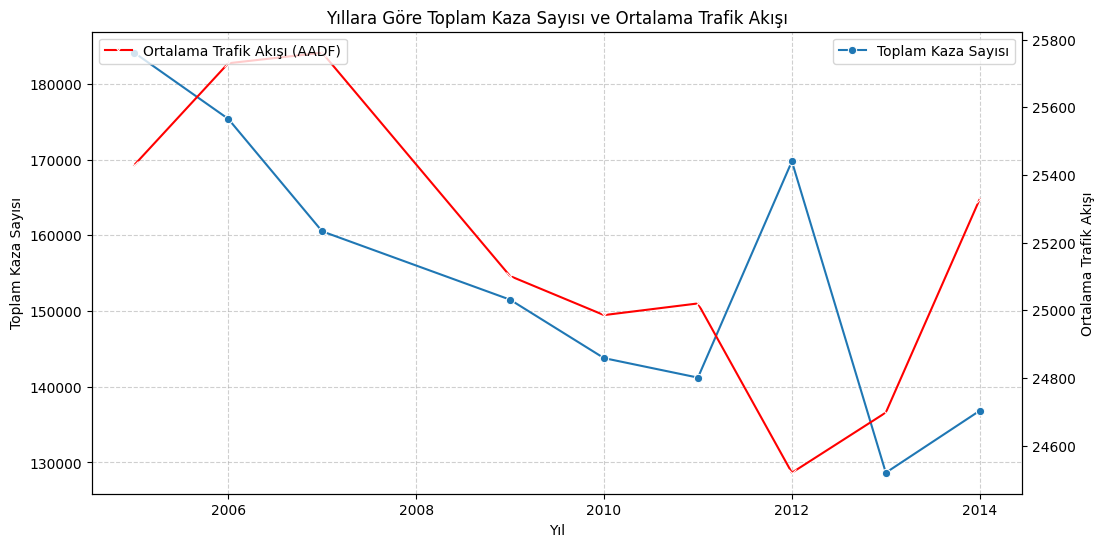

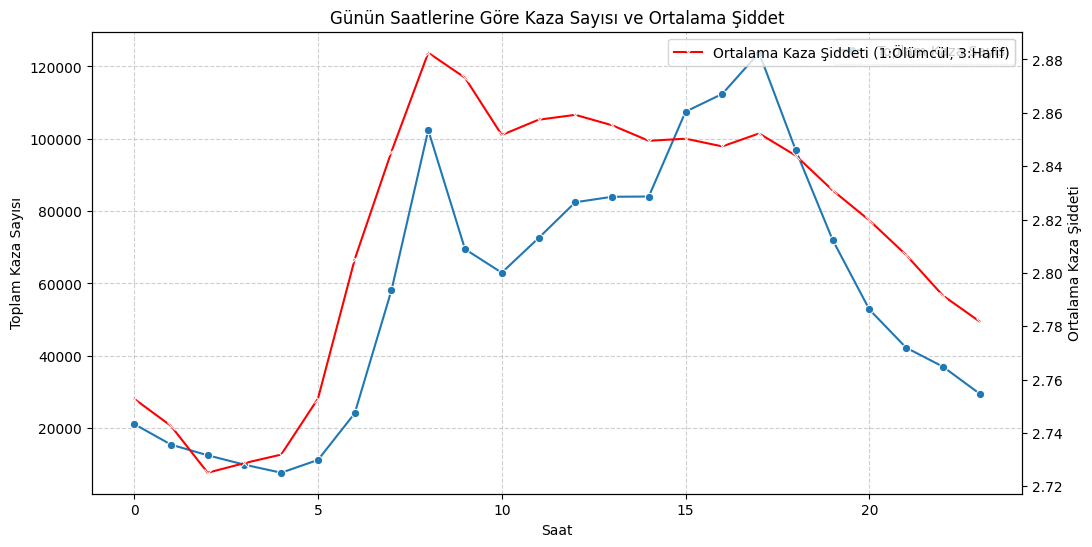


--- Kentsel ve Kƒ±rsal Alanlara G√∂re Kaza √ñzeti ---
  Urban_or_Rural_Area_Label  Total_Accidents  Avg_Severity  Avg_Traffic_Flow
1                     Urban           909453      2.863738      25173.595229
0                     Rural           482278      2.798015      25232.608406


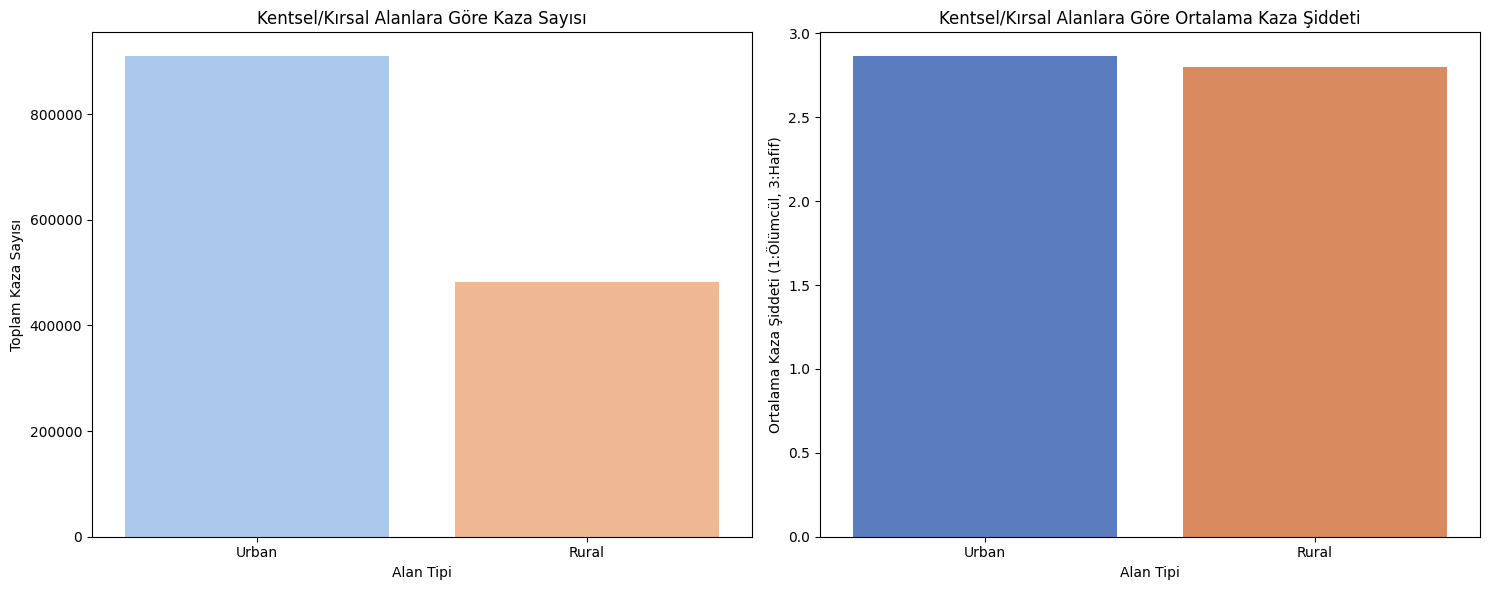


--- Kaza ≈ûiddetine G√∂re Ortalama Trafik Akƒ±≈üƒ± ---
   Accident_Severity  Average_Traffic_Flow  Total_Accidents
0                  1          23299.774667            17392
1                  2          23881.558126           186553
2                  3          25427.920202          1187786


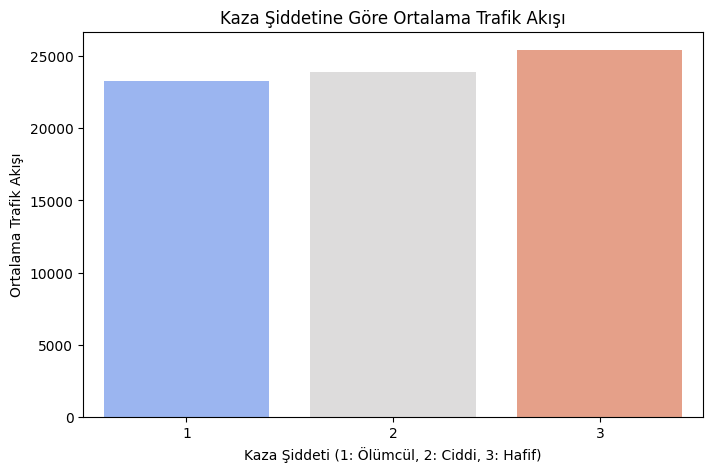

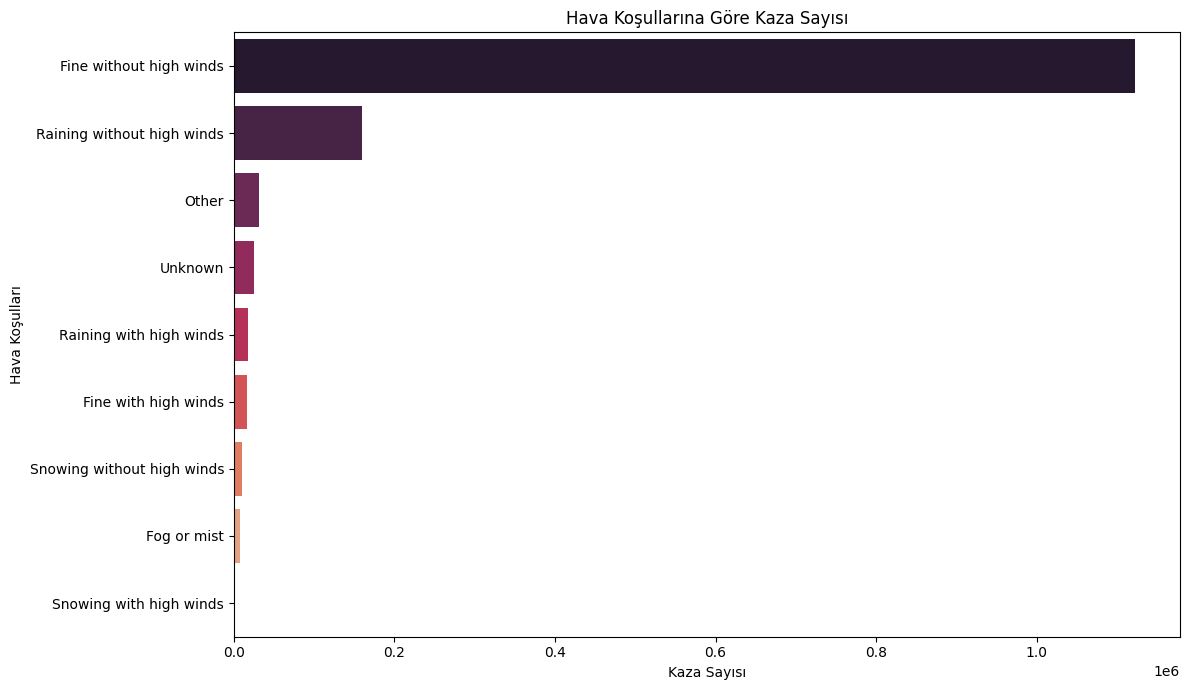

In [15]:
print("\n--- Ke≈üifsel Veri Analizine Ba≈ülanƒ±yor ---")

# --- Soru 1: Kazalar Yƒ±llara G√∂re Nasƒ±l Deƒüi≈üiyor? ---
# Yƒ±llara g√∂re kaza sayƒ±larƒ±nƒ± ve trafik akƒ±≈üƒ±nƒ± kar≈üƒ±la≈ütƒ±ralƒ±m.
yearly_summary = df_accidents.groupby('Year').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Average_Traffic_Flow=('Matched_Traffic_Flow', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Total_Accidents', marker='o', label='Toplam Kaza Sayƒ±sƒ±')
plt.title('Yƒ±llara G√∂re Toplam Kaza Sayƒ±sƒ± ve Ortalama Trafik Akƒ±≈üƒ±')
plt.xlabel('Yƒ±l')
plt.ylabel('Toplam Kaza Sayƒ±sƒ±')
plt.grid(True, linestyle='--', alpha=0.6)
plt.twinx() # ƒ∞kinci bir y ekseni ekle
sns.lineplot(data=yearly_summary, x='Year', y='Average_Traffic_Flow', marker='x', color='red', label='Ortalama Trafik Akƒ±≈üƒ± (AADF)')
plt.ylabel('Ortalama Trafik Akƒ±≈üƒ±')
plt.legend(loc='upper left')
plt.show()

# --- Soru 2: G√ºn√ºn Saatlerine G√∂re Kaza Daƒüƒ±lƒ±mƒ± ve ≈ûiddeti Nasƒ±l Deƒüi≈üiyor? ---
# 'Hour' s√ºtununu sayƒ±sal tipe d√∂n√º≈üt√ºrelim, bazƒ± deƒüerler pd.NA olduƒüu i√ßin object kalmƒ±≈ü olabilir.
# NaN deƒüerlerini ≈üimdilik atlayalƒ±m veya belirli bir deƒüerle dolduralƒ±m.
# df_accidents['Hour'] = pd.to_numeric(df_accidents['Hour'], errors='coerce')
# df_accidents.dropna(subset=['Hour'], inplace=True) # Saati olmayan kazalarƒ± ≈üimdilik d√º≈ü√ºrelim
# df_accidents['Hour'] = df_accidents['Hour'].astype(int) # int'e √ßevirelim

# √ñnceki adƒ±mda Hour'ƒ± object olarak bƒ±rakmƒ±≈ütƒ±k, burada int'e d√∂n√º≈üt√ºrelim
# Eƒüer hala pd.NA varsa sayƒ±sal deƒüere √ßevirirken hata vermemesi i√ßin
df_accidents['Hour'] = df_accidents['Hour'].astype(str).str.split(':').str[0].astype(int) # Stringe √ßevirip sadece saat kƒ±smƒ±nƒ± al

hourly_summary = df_accidents.groupby('Hour').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Avg_Severity=('Accident_Severity', 'mean') # Ortalama kaza ≈üiddeti (d√º≈ü√ºk deƒüer daha k√∂t√º)
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_summary, x='Hour', y='Total_Accidents', marker='o', label='Toplam Kaza Sayƒ±sƒ±')
plt.title('G√ºn√ºn Saatlerine G√∂re Kaza Sayƒ±sƒ± ve Ortalama ≈ûiddet')
plt.xlabel('Saat')
plt.ylabel('Toplam Kaza Sayƒ±sƒ±')
plt.grid(True, linestyle='--', alpha=0.6)
plt.twinx()
sns.lineplot(data=hourly_summary, x='Hour', y='Avg_Severity', marker='x', color='red', label='Ortalama Kaza ≈ûiddeti (1:√ñl√ºmc√ºl, 3:Hafif)')
plt.ylabel('Ortalama Kaza ≈ûiddeti')
plt.legend(loc='upper right')
plt.show()


# --- Soru 3: Kentsel ve Kƒ±rsal Alanlardaki Kaza Daƒüƒ±lƒ±mƒ± ve ≈ûiddeti ---
# 'Urban_or_Rural_Area' s√ºtunundaki deƒüerleri a√ßƒ±klayƒ±cƒ± metinlere √ßevirelim
area_mapping = {1: 'Urban', 2: 'Rural', 3: 'Unknown'} # Eƒüer 3 varsa, Unknown olarak kabul edelim
df_accidents['Urban_or_Rural_Area_Label'] = df_accidents['Urban_or_Rural_Area'].map(area_mapping)

area_summary = df_accidents.groupby('Urban_or_Rural_Area_Label').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Avg_Severity=('Accident_Severity', 'mean'),
    Avg_Traffic_Flow=('Matched_Traffic_Flow', 'mean')
).reset_index().sort_values(by='Total_Accidents', ascending=False)

print("\n--- Kentsel ve Kƒ±rsal Alanlara G√∂re Kaza √ñzeti ---")
print(area_summary)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) # 1 satƒ±r, 2 s√ºtunlu grafiklerin ilki
sns.barplot(data=area_summary, x='Urban_or_Rural_Area_Label', y='Total_Accidents', palette='pastel')
plt.title('Kentsel/Kƒ±rsal Alanlara G√∂re Kaza Sayƒ±sƒ±')
plt.xlabel('Alan Tipi')
plt.ylabel('Toplam Kaza Sayƒ±sƒ±')

plt.subplot(1, 2, 2) # 1 satƒ±r, 2 s√ºtunlu grafiklerin ikincisi
sns.barplot(data=area_summary, x='Urban_or_Rural_Area_Label', y='Avg_Severity', palette='muted')
plt.title('Kentsel/Kƒ±rsal Alanlara G√∂re Ortalama Kaza ≈ûiddeti')
plt.xlabel('Alan Tipi')
plt.ylabel('Ortalama Kaza ≈ûiddeti (1:√ñl√ºmc√ºl, 3:Hafif)')
plt.tight_layout()
plt.show()

# --- Soru 4: Kaza ≈ûiddeti ile Trafik Akƒ±≈üƒ± Arasƒ±nda Bir ƒ∞li≈üki Var mƒ±? ---
# Kaza ≈üiddeti seviyelerine g√∂re ortalama trafik akƒ±≈üƒ±nƒ± inceleyelim.
severity_traffic_summary = df_accidents.groupby('Accident_Severity').agg(
    Average_Traffic_Flow=('Matched_Traffic_Flow', 'mean'),
    Total_Accidents=('Accident_Index', 'count')
).reset_index().sort_values(by='Accident_Severity')

print("\n--- Kaza ≈ûiddetine G√∂re Ortalama Trafik Akƒ±≈üƒ± ---")
print(severity_traffic_summary)

plt.figure(figsize=(8, 5))
sns.barplot(data=severity_traffic_summary, x='Accident_Severity', y='Average_Traffic_Flow', palette='coolwarm')
plt.title('Kaza ≈ûiddetine G√∂re Ortalama Trafik Akƒ±≈üƒ±')
plt.xlabel('Kaza ≈ûiddeti (1: √ñl√ºmc√ºl, 2: Ciddi, 3: Hafif)')
plt.ylabel('Ortalama Trafik Akƒ±≈üƒ±')
plt.show()

# --- Soru 5: Hava Ko≈üullarƒ±nƒ±n Kaza Sayƒ±sƒ±na Etkisi ---
weather_summary = df_accidents['Weather_Conditions'].value_counts().reset_index()
weather_summary.columns = ['Weather_Conditions', 'Accident_Count']

plt.figure(figsize=(12, 7))
sns.barplot(data=weather_summary, x='Accident_Count', y='Weather_Conditions', palette='rocket')
plt.title('Hava Ko≈üullarƒ±na G√∂re Kaza Sayƒ±sƒ±')
plt.xlabel('Kaza Sayƒ±sƒ±')
plt.ylabel('Hava Ko≈üullarƒ±')
plt.tight_layout()
plt.show()

## üïµÔ∏è‚Äç‚ôÄÔ∏è Ke≈üifsel Veri Analizi (EDA) Bulgularƒ±: Detaylƒ± Yorumlama

Birle≈üik Krallƒ±k'taki trafik kazalarƒ±na ili≈ükin yapƒ±lan EDA √ßalƒ±≈ümalarƒ±, √ße≈üitli √ßevresel ve trafik fakt√∂rleriyle kazalar arasƒ±ndaki ili≈ükileri ortaya koymu≈ütur. A≈üaƒüƒ±da temel grafiksel analizlerin √∂ne √ßƒ±kan bulgularƒ± yer almaktadƒ±r:

---

### 1. üìâ Yƒ±llara G√∂re Toplam Kaza Sayƒ±sƒ± ve Ortalama Trafik Akƒ±≈üƒ±

**G√∂zlemler:**
- 2005‚Äì2012 arasƒ±nda toplam kaza sayƒ±sƒ±nda istikrarlƒ± bir d√º≈ü√º≈ü g√∂zlenmi≈ütir.
- Ortalama trafik akƒ±≈üƒ± da 2006 sonrasƒ± genel bir azalma trendi g√∂stermektedir.
- 2012‚Äôde trafik d√º≈üerken kaza sayƒ±sƒ± artmƒ±≈ütƒ±r ‚Üí bu da tek ba≈üƒ±na trafik yoƒüunluƒüunun belirleyici olmadƒ±ƒüƒ±nƒ± g√∂sterir.

**√áƒ±karƒ±mlar:**
- Trafik akƒ±≈üƒ± ve kaza sayƒ±sƒ±ndaki d√º≈ü√º≈ü paraleldir, ancak her zaman √∂rt√º≈ümemektedir.
- Bu d√º≈ü√º≈ü; yol g√ºvenliƒüi tedbirleri, ula≈üƒ±m tercihlerindeki deƒüi≈üiklikler ve ekonomik fakt√∂rlerle a√ßƒ±klanabilir.

---

### 2. ‚è∞ G√ºn√ºn Saatlerine G√∂re Kaza Sayƒ±sƒ± ve Ortalama ≈ûiddet

**G√∂zlemler:**
- En yoƒüun kazalar sabah (07:00‚Äì09:00) ve ak≈üam (15:00‚Äì18:00) saatlerinde.
- Gece saatlerinde (00:00‚Äì05:00) kaza sayƒ±sƒ± az, fakat ≈üiddeti y√ºksektir.
- Pik saatlerde ise kaza sayƒ±sƒ± fazla ama genellikle hafif kazalardƒ±r.

**√áƒ±karƒ±mlar:**
- Trafik yoƒüunluƒüu arttƒ±k√ßa kaza sayƒ±sƒ± artmakta fakat ≈üiddet d√º≈ümektedir.
- Gece kazalarƒ± daha azdƒ±r fakat daha √∂l√ºmc√ºl olabilir ‚Üí muhtemel nedenler: hƒ±z, yorgunluk, alkol etkisi.

---

### 3. üèôÔ∏è Kentsel ve Kƒ±rsal Alanlara G√∂re Kaza Daƒüƒ±lƒ±mƒ± ve ≈ûiddeti

**G√∂zlemler:**
- Kaza sayƒ±sƒ± kentsel alanlarda daha fazladƒ±r (yakla≈üƒ±k 2 kat).
- ≈ûiddet bakƒ±mƒ±ndan kƒ±rsal kazalar daha √∂l√ºmc√ºl.
- Ortalama trafik akƒ±≈üƒ± kentsel ve kƒ±rsal alanlarda benzerdir.

**√áƒ±karƒ±mlar:**
- Kentsel b√∂lgelerde daha fazla kaza ‚Üí y√ºksek n√ºfus, karma≈üƒ±k yollar, yaya yoƒüunluƒüu.
- Kƒ±rsalda ise daha az ama daha ciddi kazalar ‚Üí y√ºksek hƒ±zlar, d√º≈ü√ºk aydƒ±nlatma, ge√ß m√ºdahale gibi etkenler.
- Yalnƒ±zca trafik yoƒüunluƒüu deƒüil, **fiziksel yol √∂zellikleri** de √∂nemli belirleyicidir.

---

### 4. üö¶ Kaza ≈ûiddetine G√∂re Ortalama Trafik Akƒ±≈üƒ±

**G√∂zlemler:**
- Hafif kazalar (Severity 3) en yaygƒ±n; √∂l√ºmc√ºl kazalar en az.
- Ortalama trafik akƒ±≈üƒ±, kaza ≈üiddeti arttƒ±k√ßa azalmakta.

**√áƒ±karƒ±mlar:**
- Y√ºksek trafik akƒ±≈üƒ±nda kazalar daha hafif ‚Üí d√º≈ü√ºk hƒ±zla √ßarpƒ±≈ümalar.
- D√º≈ü√ºk trafik akƒ±≈üƒ±nda ise kazalar daha √∂l√ºmc√ºl olabilir ‚Üí hƒ±z fakt√∂r√º etkili.
- Bu durum, **yoƒüun trafiƒüin kazalarƒ±n sayƒ±sƒ±nƒ± artƒ±rsa da ≈üiddetini d√º≈ü√ºrd√ºƒü√º** hipotezini desteklemektedir.

---

### 5. üåßÔ∏è Hava Ko≈üullarƒ±na G√∂re Kaza Sayƒ±sƒ±

**G√∂zlemler:**
- En √ßok kaza ‚ÄúG√ºzel hava‚Äù ko≈üullarƒ±nda ya≈üanmƒ±≈ütƒ±r.
- Yaƒümurlu hava kazalarƒ± √∂nemli oranda artƒ±rmakta.
- ≈ûiddetli hava ko≈üullarƒ±nda kaza sayƒ±sƒ± d√º≈ümektedir.

**√áƒ±karƒ±mlar:**
- G√ºzel hava ko≈üullarƒ± ‚Üí yollar daha √ßok kullanƒ±ldƒ±ƒüƒ±ndan kazalar fazladƒ±r.
- Yaƒümurlu hava ‚Üí yol tutu≈üu azalƒ±r, kazalar artar.
- ≈ûiddetli hava ‚Üí s√ºr√ºc√ºler dikkatli olur, hƒ±z d√º≈ü√ºr√ºl√ºr veya seyahat iptal edilir ‚Üí **davranƒ±≈üsal adaptasyon**.

---

### üìå Genel Deƒüerlendirme

EDA sonu√ßlarƒ±, trafik kazalarƒ±nƒ±n yalnƒ±zca trafik yoƒüunluƒüu ile deƒüil; saat, hava durumu, alan t√ºr√º gibi **√ßok boyutlu fakt√∂rlerle ≈üekillendiƒüini** a√ßƒ±k√ßa g√∂stermektedir. Bu bulgular, ileri d√ºzey modelleme a≈üamalarƒ±nda dikkate alƒ±narak daha doƒüru tahmin sistemlerinin geli≈ütirilmesine katkƒ± saƒülayacaktƒ±r.
